In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sb

import sys
sys.path.insert(1, '../Merging_Data')

import WranglerFunctions as wf
import FullDataset as fd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from scipy.stats import pearsonr

In [2]:
earnings = pd.read_csv('../Datasets/Financial_dataset/F3METL_Comp.csv', index_col=False, encoding = 'unicode_escape')
earnings = wf.F3Metl_Comp_Wrangler(earnings)
earnings

RIO LN Equity                                                      \
                 PX_OPEN   PX_HIGH    PX_LOW   PX_LAST PX_VOLUME      EBITDA   
Dates                                                                          
2000-01-04      1239.156  1243.287  1210.242  1217.677   3585947   1404.1713   
2000-01-05      1210.242  1218.503  1159.024  1163.981   3342568   1404.1713   
2000-01-06      1173.068  1218.503  1173.068  1205.286   9503906   1404.1713   
2000-01-07      1214.373  1226.764  1185.459  1220.982   7508500   1404.1713   
2000-01-10      1224.286  1226.764  1181.329  1193.720   6438418   1404.1713   
...                  ...       ...       ...       ...       ...         ...   
2022-01-25      5312.000  5353.000  5276.000  5311.000   2538309  19744.0000   
2022-01-26      5422.000  5506.000  5388.000  5434.000   2878571  19744.0000   
2022-01-27      5399.000  5623.000  5384.000  5569.000   2943232  19744.0000   
2022-01-28      5628.000  5665.000  5365.000  5386.000   6162008  19744.0000   
2022-01-31      5400.000  5409.000  5178.000  5185.000   3349054  19744.0000   

                    GLEN LN Equity                  ... EVR LN Equity          \
           PE_RATIO        PX_OPEN PX_HIGH  PX_LOW  ...     PX_VOLUME  EBITDA   
Dates                                               ...                         
2000-01-04  25.8338            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-05  24.7820            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-06  25.6770            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-07  25.8881            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-10  25.3255            NaN     NaN     NaN  ...           NaN     NaN   
...             ...            ...     ...     ...  ...           ...     ...   
2022-01-25   6.1803         391.35  395.00  385.55  ...     3070741.0  2061.0   
2022-01-26   6.3346         394.65  406.00  393.55  ...     2865499.0  2061.0   
2022-01-27   6.4205         393.85  408.25  389.95  ...     2745585.0  2061.0   
2022-01-28   6.2169         402.00  403.00  389.85  ...     3847210.0  2061.0   
2022-01-31   6.0059         397.55  398.40  382.10  ...     2175911.0  2061.0   

                    BHP LN Equity                                            \
           PE_RATIO       PX_OPEN PX_HIGH  PX_LOW PX_LAST  PX_VOLUME EBITDA   
Dates                                                                         
2000-01-04      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-05      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-06      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-07      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-10      NaN           NaN     NaN     NaN     NaN        NaN   2489   
...             ...           ...     ...     ...     ...        ...    ...   
2022-01-25   6.2323           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-26   6.3396           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-27   6.4637           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-28   6.3724           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-31   6.3604        2426.0  2426.0  2341.5  2347.0  5257964.0  20181   

                     
           PE_RATIO  
Dates                
2000-01-04      NaN  
2000-01-05      NaN  
2000-01-06      NaN  
2000-01-07      NaN  
2000-01-10      NaN  
...             ...  
2022-01-25      NaN  
2022-01-26      NaN  
2022-01-27      NaN  
2022-01-28      NaN  
2022-01-31      NaN  

[5760 rows x 42 columns]

In [3]:
RIO_earnings = earnings['BHP LN Equity']['EBITDA'].to_frame()
RIO_earnings

,EBITDA
Dates,
2000-01-04,2489
2000-01-05,2489
2000-01-06,2489
2000-01-07,2489
2000-01-10,2489
...,...
2022-01-25,20181
2022-01-26,20181
2022-01-27,20181


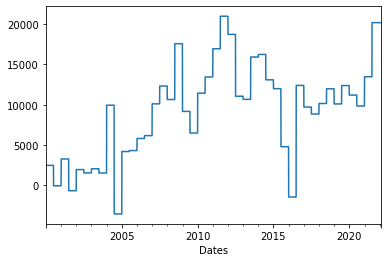

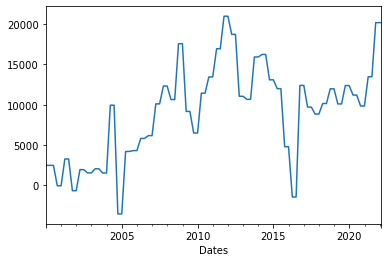

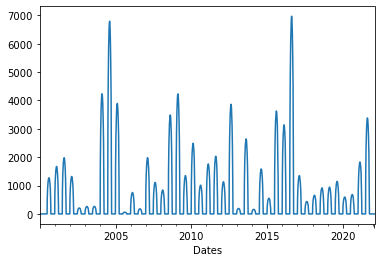

In [4]:
mean = RIO_earnings['EBITDA'].rolling('90D', min_periods=1).mean()
std = RIO_earnings['EBITDA'].rolling('90D', min_periods=1).std()

RIO_earnings['EBITDA'].plot()
plt.show()
mean.plot()
plt.show()
std.plot()
plt.show()

In [5]:
earnings['RIO LN Equity'].loc[earnings['RIO LN Equity']['EBITDA'].drop_duplicates().index].corr()

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,EBITDA,PE_RATIO
PX_OPEN,1.000000,0.999850,0.999810,0.999484,-0.239973,0.744303,-0.087795
PX_HIGH,0.999850,1.000000,0.999836,0.999794,-0.237720,0.743561,-0.081101
PX_LOW,0.999810,0.999836,1.000000,0.999784,-0.244345,0.739474,-0.088540
PX_LAST,0.999484,0.999794,0.999784,1.000000,-0.243616,0.739113,-0.078522
PX_VOLUME,-0.239973,-0.237720,-0.244345,-0.243616,1.000000,-0.091089,0.142289
EBITDA,0.744303,0.743561,0.739474,0.739113,-0.091089,1.000000,-0.086170
PE_RATIO,-0.087795,-0.081101,-0.088540,-0.078522,0.142289,-0.086170,1.000000


# LSTM

When rerunning code you have to restart the kernel and run from the start.

In [57]:
# inflation_original = pd.read_csv('../Datasets/Economic_dataset/Inflation.csv', index_col = False)
# clean_inflation = wf.Inflation_Unemployment_Wrangler(inflation_original)
# unemployment_original = pd.read_csv('../Datasets/Economic_dataset/Unemployment.csv', index_col = False)
# clean_unemployment, _ = wf.Inflation_Unemployment_Wrangler(unemployment_original)

# def getEBITDAUnique(df, companyName):
#     earnings_unique = df[companyName]['EBITDA'].drop_duplicates()
#     earnings_unique = pd.DataFrame(earnings_unique)
#     earnings_unique = earnings_unique.dropna()
#     earnings_unique = earnings_unique.reset_index()
#     return earnings_unique

# def closest_date(dateList, date, start, end):
#     if start > end:
#         return (start + end) // 2

#     mid = (start + end) // 2
#     if date == dateList[mid]:
#         return mid

#     if date < dateList[mid]:
#         return closest_date(dateList, date, start, mid-1)
#     else:
#         return closest_date(dateList, date, mid+1, end)

# def add_inflation(df, inflation):
#     df['Inflation Rate'] = np.nan
#     i = 0
#     for i in range(len(df)):
#         date = df['Dates'][i]
#         closestInflationDate = closest_date(inflation['Date'], date, 0, len(inflation['Date']))
#         df.loc[i, 'Inflation Rate'] = inflation['Inflation Rate'][closestInflationDate]
#     return df

# def add_Unemployment(df, unemployment):
#     df['Unemployment'] = np.nan
#     i = 0
#     for i in range(len(df)):
#         date = df['Dates'][i]
#         closestDate = closest_date(unemployment['Date'], date, 0, len(unemployment['Date']))
#         df.loc[i, 'Unemployment'] = unemployment['Unemployment Rate'][closestDate]
#     return df

RIO_full = fd.GetFullDatasetForCompany("RIO LN Equity")
RIO_full.index = RIO_full['Date']
RIO_full = RIO_full.drop('Date', axis = 1)
RIO_full

C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\WranglerFunctions.py:138: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(location   , index_col=False, names=["Dates", "PX_LAST"])
C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\WranglerFunctions.py:138: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(location   , index_col=False, names=["Dates", "PX_LAST"])
C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\FullDataset.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,EBITDA,CL1_COMB_Comodity_PX_LAST,LMAHDS03_LME_Comdty_PX_LAST,LMPBDS03_LME_Comdty_PX_LAST,LMSNDS03_LME_Comdty_PX_LAST,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,LMCODY_LME_Comdty_PX_LAST,LTBMPRIN_Index_PX_LAST,Inflation Rate,...,SPX500 Index PX_VOLUME,F3METL_PX_LAST,F3METL_PX_VOLUME,GUKG10 Index PX_LAST,BCOMIN_PX_LAST,UK_GDP growth,China_GDP growth,Japan_GDP growth,USA_GDP growth,Shipping costs_Shipping costs
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,1404.1713,25.60,1650.0,495.5,6125.0,1169.92932,5250.27881,39125.0,100.00,1.1,...,1.072386e+09,4188.60,9624338.0,5.662,80.1822,1.0,2.4,7.0,1.5,998.2346
2000-06-30,1369.7180,32.50,1580.0,449.0,5510.0,1180.81665,5310.37646,39125.0,100.00,0.8,...,1.258792e+09,2323.00,9624338.0,5.171,76.2545,0.6,2.4,1.9,7.5,998.2346
2001-01-01,1628.6273,26.80,1565.0,483.0,5195.0,1223.13721,4559.14844,39125.0,100.00,0.8,...,1.318392e+09,1697.10,9624338.0,4.881,74.5400,0.9,2.4,3.0,-1.3,998.2346
2001-07-02,1568.2136,26.25,1473.0,453.0,4625.0,1108.59253,4278.52930,39125.0,100.00,1.7,...,1.256211e+09,1480.40,9624338.0,5.302,66.0225,0.5,2.4,-4.3,-1.6,998.2346
2001-12-31,1583.2303,19.84,1355.0,497.0,3940.0,1023.74707,3848.54346,39125.0,100.00,1.1,...,1.089302e+09,1733.20,9624338.0,5.054,58.5132,0.2,2.4,-1.4,1.1,998.2346
2002-07-01,945.0000,26.86,1388.0,461.0,4460.0,1104.12988,4686.17041,39125.0,100.00,0.6,...,1.590400e+09,2112.30,21369987.0,5.010,63.8257,0.7,2.4,1.3,1.6,998.2346
2002-12-31,840.0000,31.20,1350.0,436.0,4280.0,968.64325,4427.19629,39125.0,100.00,1.7,...,1.084224e+09,656.00,2508529.0,4.374,59.2308,0.9,2.4,1.1,0.5,998.2346
2003-06-30,1178.0000,30.19,1365.0,479.0,4650.0,1001.33105,4967.32813,39125.0,100.00,1.1,...,1.353031e+09,2427.00,37377019.0,4.157,62.0931,0.8,2.4,2.8,3.6,998.2346
2003-12-31,1324.0000,32.52,1600.0,724.0,6525.0,1290.23218,9251.99023,39125.0,100.00,1.3,...,8.362977e+08,4854.00,11824331.0,4.802,84.1474,0.8,2.4,4.4,4.7,998.2346


In [7]:
# RIO_unique = getEBITDAUnique(earnings, "RIO LN Equity")
# add_Unemployment(RIO_unique, clean_unemployment)
# add_inflation(RIO_unique, clean_inflation[0])
# RIO_unique.index = RIO_unique["Dates"]
# RIO_unique = RIO_unique.drop("Dates", axis = 1)
# RIO_unique

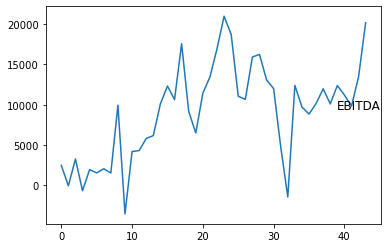

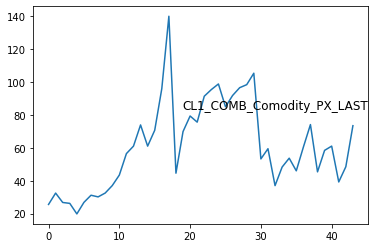

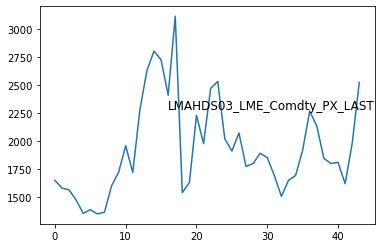

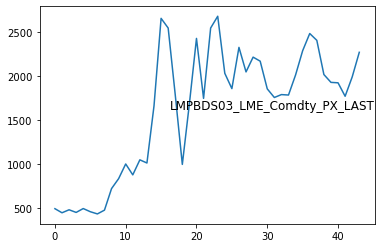

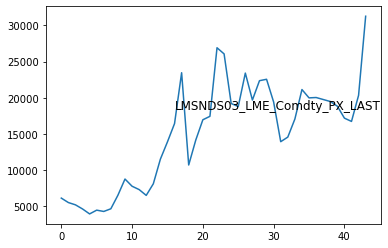

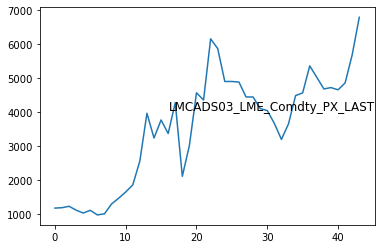

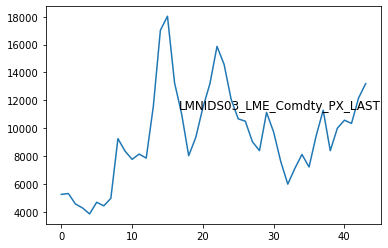

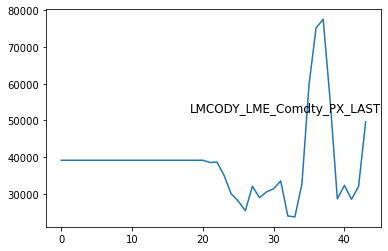

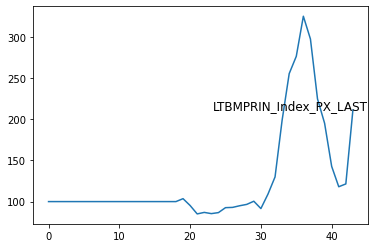

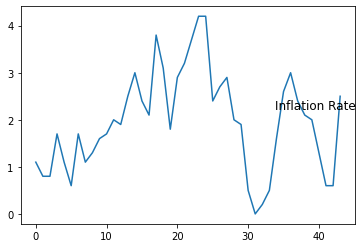

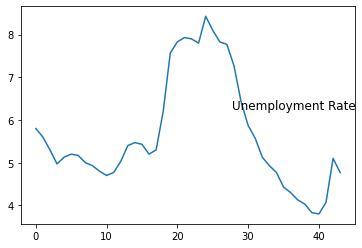

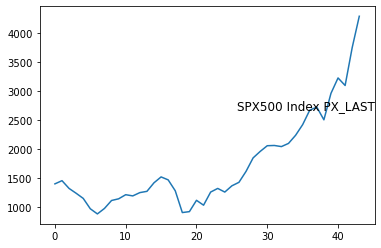

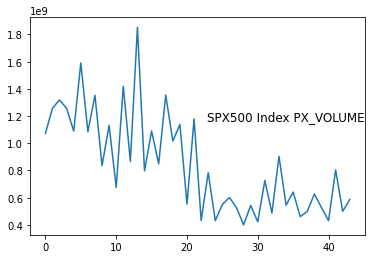

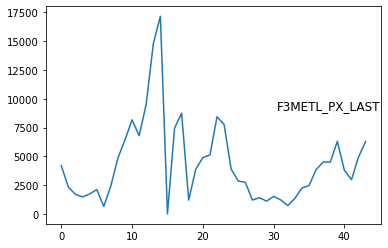

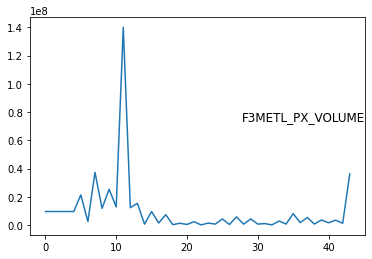

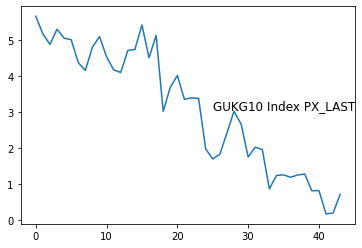

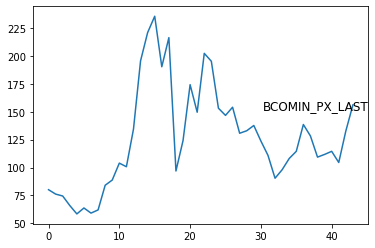

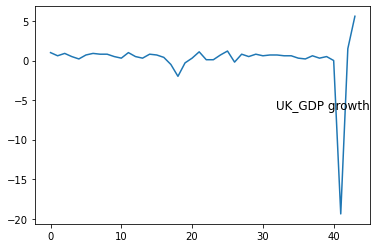

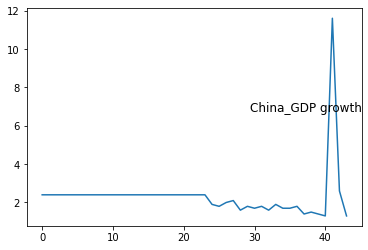

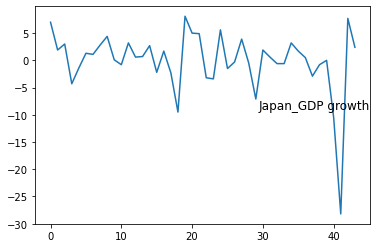

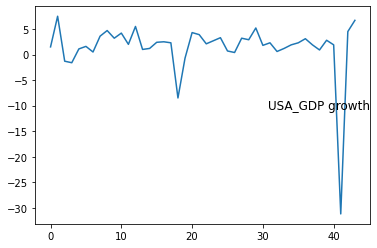

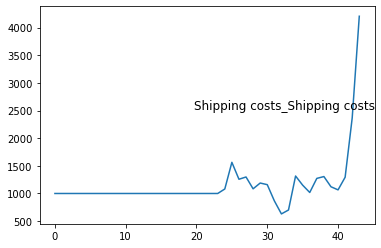

In [8]:
groups = range(len(RIO_full.columns))
i = 1
values = RIO_full.values
# plot each column
# plt.figure()
for group in groups:
#     plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(RIO_full.columns[group], y=0.5, loc='right')
    plt.show()
    i += 1

In [9]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
    
# Lag is number of datapoints it looks previously
lag = 2
reframed = series_to_supervised(scaled, lag, 1)
#reframed.drop(reframed.columns[range(len(RIO_full.columns) + 1, 2*len(RIO_full.columns))], axis=1, inplace=True)
print(list(range(2*len(RIO_full.columns) + 1, 3*len(RIO_full.columns) - 1)))
reframed

[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),...,var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),var22(t)
2,0.245633,0.047936,0.170068,0.026468,0.079993,0.034559,0.098801,0.286537,0.062354,0.261905,...,0.632084,0.098858,0.067804,0.857741,0.090610,0.812,0.106796,0.859504,0.772610,0.103356
3,0.142262,0.105360,0.130386,0.005783,0.057478,0.036428,0.103037,0.286537,0.062354,0.190476,...,0.589295,0.086235,0.067804,0.934426,0.042455,0.796,0.106796,0.658402,0.764858,0.103356
4,0.277873,0.057923,0.121882,0.020907,0.045945,0.043694,0.050087,0.286537,0.062354,0.190476,...,0.474439,0.100961,0.067804,0.889253,0.000000,0.784,0.106796,0.738292,0.834625,0.103356
5,0.117369,0.053346,0.069728,0.007562,0.025078,0.024028,0.030308,0.286537,0.062354,0.404762,...,0.819262,0.123044,0.151738,0.881239,0.030035,0.804,0.106796,0.812672,0.847545,0.103356
6,0.224249,0.000000,0.002834,0.027135,0.000000,0.009461,0.000000,0.286537,0.062354,0.261905,...,0.470945,0.038213,0.016955,0.765392,0.004057,0.812,0.106796,0.807162,0.819121,0.103356
7,0.207272,0.058422,0.021542,0.011121,0.019037,0.023262,0.059040,0.286537,0.062354,0.142857,...,0.655920,0.141376,0.266123,0.725865,0.020239,0.808,0.106796,0.853994,0.899225,0.103356
8,0.228493,0.094541,0.000000,0.000000,0.012447,0.000000,0.040786,0.286537,0.062354,0.404762,...,0.300338,0.282752,0.083525,0.843351,0.144926,0.808,0.106796,0.898072,0.927649,0.103356
9,0.206905,0.086135,0.008503,0.019128,0.025993,0.005612,0.078857,0.286537,0.062354,0.261905,...,0.503452,0.374649,0.180412,0.897450,0.171372,0.796,0.106796,0.779614,0.888889,0.103356
10,0.549992,0.105526,0.141723,0.128114,0.094637,0.055213,0.380862,0.286537,0.062354,0.309524,...,0.189686,0.475965,0.090766,0.795082,0.256918,0.788,0.106796,0.754821,0.914729,0.103356
11,0.000000,0.143226,0.210884,0.178381,0.176460,0.084453,0.318247,0.286537,0.062354,0.380952,...,0.701456,0.395853,1.000000,0.728779,0.238722,0.816,0.106796,0.865014,0.857881,0.103356


In [10]:
# split into train and test sets
values = reframed.values
n_train_hours = 30
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = lag * 22
train_X, train_y = train[:, :n_obs], train[:, -22]
test_X, test_y = test[:, :n_obs], test[:, -22]
# reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], lag, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], lag, test_X.shape[1]))

train_X = train_X.reshape((train_X.shape[0], lag, 22))
test_X = test_X.reshape((test_X.shape[0], lag, 22))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(30, 2, 22) (30,) (12, 2, 22) (12,)


Epoch 1/50
1/1 - 1s - loss: 0.5600 - val_loss: 0.5992
Epoch 2/50
1/1 - 0s - loss: 0.5172 - val_loss: 0.5578
Epoch 3/50
1/1 - 0s - loss: 0.4751 - val_loss: 0.5165
Epoch 4/50
1/1 - 0s - loss: 0.4330 - val_loss: 0.4772
Epoch 5/50
1/1 - 0s - loss: 0.3927 - val_loss: 0.4421
Epoch 6/50
1/1 - 0s - loss: 0.3525 - val_loss: 0.4067
Epoch 7/50
1/1 - 0s - loss: 0.3120 - val_loss: 0.3709
Epoch 8/50
1/1 - 0s - loss: 0.2753 - val_loss: 0.3350
Epoch 9/50
1/1 - 0s - loss: 0.2426 - val_loss: 0.2990
Epoch 10/50
1/1 - 0s - loss: 0.2117 - val_loss: 0.2628
Epoch 11/50
1/1 - 0s - loss: 0.1892 - val_loss: 0.2280
Epoch 12/50
1/1 - 0s - loss: 0.1777 - val_loss: 0.1948
Epoch 13/50
1/1 - 0s - loss: 0.1675 - val_loss: 0.1711
Epoch 14/50
1/1 - 0s - loss: 0.1637 - val_loss: 0.1504
Epoch 15/50
1/1 - 0s - loss: 0.1660 - val_loss: 0.1362
Epoch 16/50
1/1 - 0s - loss: 0.1691 - val_loss: 0.1331
Epoch 17/50
1/1 - 0s - loss: 0.1713 - val_loss: 0.1379
Epoch 18/50
1/1 - 0s - loss: 0.1738 - val_loss: 0.1434
Epoch 19/50
1/1 - 0

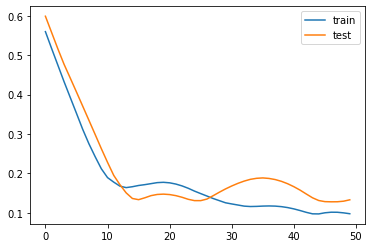

In [11]:
# design network
model = Sequential()
lstm = LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2]))
model.add(lstm)
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [12]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], lag*22))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -21:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -21:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4694.339


## Plotting forecast

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


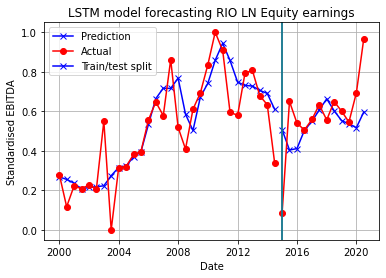

In [13]:
yhatTrain = model.predict(train_X)
plt.plot(RIO_full.index[:30], yhatTrain, c = 'b', marker = 'x')
plt.plot(RIO_full.index[:30], train_y, c = 'r', marker = 'o')

plt.plot(RIO_full.index[30:42], yhat, c = 'b', marker = 'x')
plt.plot(RIO_full.index[30:42], test_y, c = 'r', marker = 'o')

plt.axvline(RIO_full.index[30], c = 'g')
labels = ["Prediction", "Actual", "Train/test split"]
plt.legend(labels)
plt.title("LSTM model forecasting RIO LN Equity earnings")
plt.axvline(RIO_full.index[30])
plt.grid()
plt.ylabel("Standardised EBITDA")
plt.xlabel("Date")
plt.rcParams["figure.figsize"] = (8, 6)
plt.savefig("LSTM_forecast.eps", bbox_inches='tight', format = 'eps')
plt.show()

## Running LSTM with important features

In [14]:
# Calculating which correlations are statistically significant
# We choose a p-value of 0.05
# Null hypothesis is if x and y are unrelated - Anything below a p-value 0.05, means that this hypothesis is rejected.

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [15]:
pvalues = calculate_pvalues(RIO_full)
statisticallySignificant = pvalues <= 0.05
discardedColumns = statisticallySignificant[statisticallySignificant['EBITDA'].values == False].index

In [16]:
RIO_bestFeatures = RIO_full.drop(discardedColumns, axis = 1)
RIO_bestFeatures

,EBITDA,CL1_COMB_Comodity_PX_LAST,LMAHDS03_LME_Comdty_PX_LAST,LMPBDS03_LME_Comdty_PX_LAST,LMSNDS03_LME_Comdty_PX_LAST,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,Inflation Rate,Unemployment Rate,SPX500 Index PX_LAST,SPX500 Index PX_VOLUME,GUKG10 Index PX_LAST,BCOMIN_PX_LAST,Shipping costs_Shipping costs
Date,,,,,,,,,,,,,,
2000-01-04,2489,25.60,1650.00,495.5,6125.0,1169.92932,5250.27881,1.1,5.80,1399.42,1.072386e+09,5.662,80.1822,998.2346
2000-06-30,-44,32.50,1580.00,449.0,5510.0,1180.81665,5310.37646,0.8,5.60,1454.60,1.258792e+09,5.171,76.2545,998.2346
2001-01-01,3279,26.80,1565.00,483.0,5195.0,1223.13721,4559.14844,0.8,5.30,1320.28,1.318392e+09,4.881,74.5400,998.2346
2001-07-02,-654,26.25,1473.00,453.0,4625.0,1108.59253,4278.52930,1.7,4.97,1236.71,1.256211e+09,5.302,66.0225,998.2346
2001-12-31,1965,19.84,1355.00,497.0,3940.0,1023.74707,3848.54346,1.1,5.13,1148.08,1.089302e+09,5.054,58.5132,998.2346
2002-07-01,1549,26.86,1388.00,461.0,4460.0,1104.12988,4686.17041,0.6,5.20,968.65,1.590400e+09,5.010,63.8257,998.2346
2002-12-31,2069,31.20,1350.00,436.0,4280.0,968.64325,4427.19629,1.7,5.17,879.82,1.084224e+09,4.374,59.2308,998.2346
2003-06-30,1540,30.19,1365.00,479.0,4650.0,1001.33105,4967.32813,1.1,5.00,974.50,1.353031e+09,4.157,62.0931,998.2346
2003-12-31,9947,32.52,1600.00,724.0,6525.0,1290.23218,9251.99023,1.3,4.93,1111.92,8.362977e+08,4.802,84.1474,998.2346


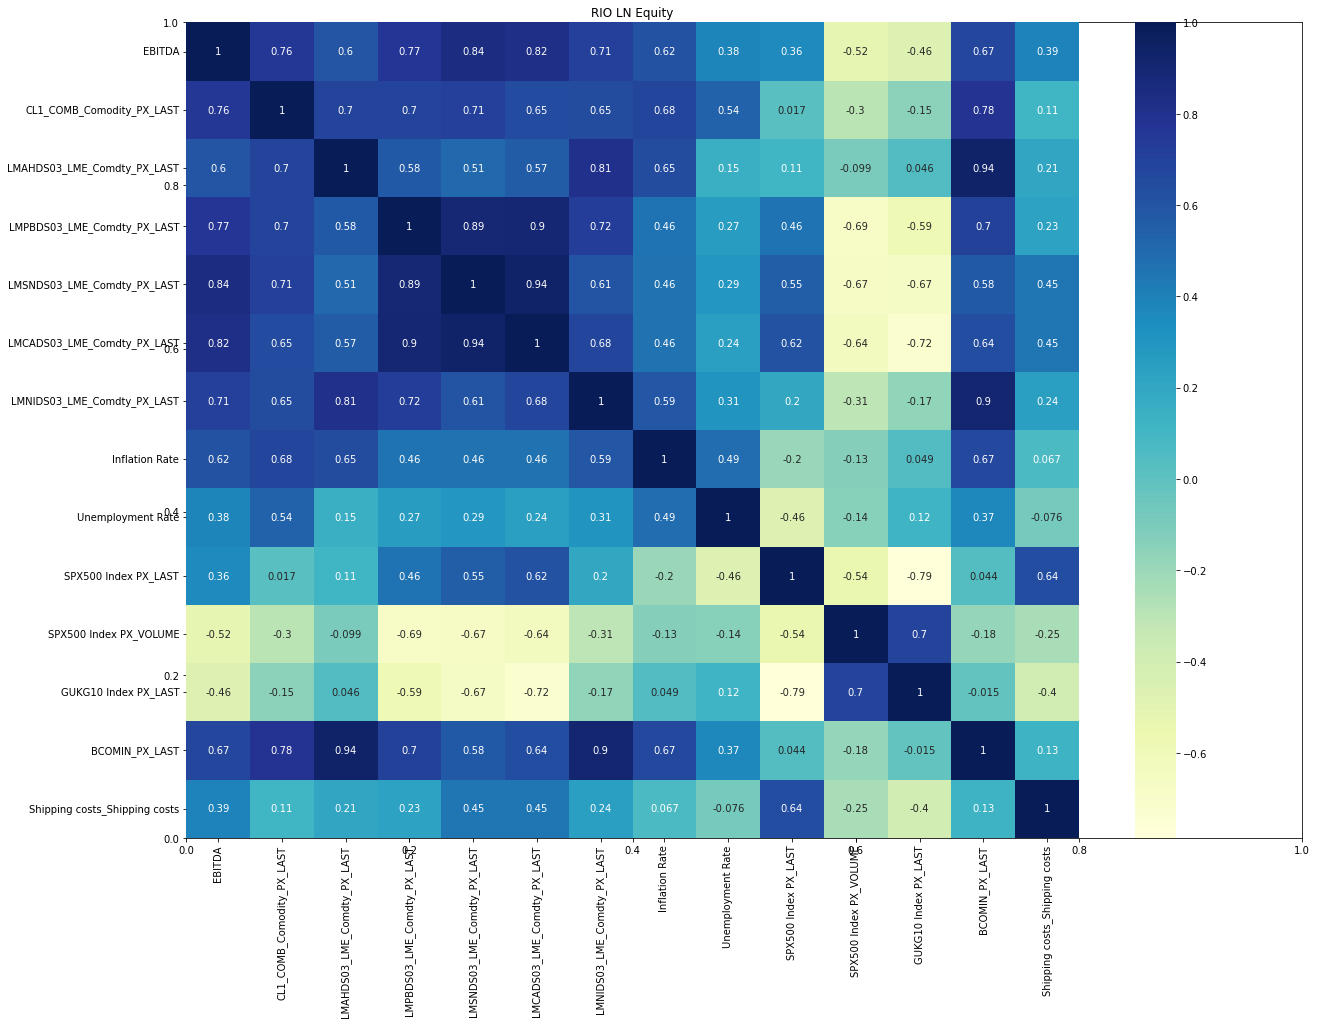

In [17]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("RIO LN Equity")
heatmap = sb.heatmap(RIO_bestFeatures.corr(), cmap="YlGnBu", annot=True)

In [18]:
values = RIO_bestFeatures.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
    
# Lag is number of datapoints it looks previously
lag = 2
reframed = series_to_supervised(scaled, lag, 1)
#reframed.drop(reframed.columns[range(len(RIO_full.columns) + 1, 2*len(RIO_full.columns))], axis=1, inplace=True)
print(list(range(2*len(RIO_bestFeatures.columns) + 1, 3*len(RIO_bestFeatures.columns) - 1)))
reframed

[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),...,var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t)
2,0.245633,0.047936,0.170068,0.026468,0.079993,0.034559,0.098801,0.261905,0.431966,0.152033,...,0.045945,0.043694,0.050087,0.190476,0.323974,0.128877,0.632084,0.857741,0.090610,0.103356
3,0.142262,0.105360,0.130386,0.005783,0.057478,0.036428,0.103037,0.190476,0.388769,0.168178,...,0.025078,0.024028,0.030308,0.404762,0.252700,0.104425,0.589295,0.934426,0.042455,0.103356
4,0.277873,0.057923,0.121882,0.020907,0.045945,0.043694,0.050087,0.190476,0.323974,0.128877,...,0.000000,0.009461,0.000000,0.261905,0.287257,0.078492,0.474439,0.889253,0.000000,0.103356
5,0.117369,0.053346,0.069728,0.007562,0.025078,0.024028,0.030308,0.404762,0.252700,0.104425,...,0.019037,0.023262,0.059040,0.142857,0.302376,0.025991,0.819262,0.881239,0.030035,0.103356
6,0.224249,0.000000,0.002834,0.027135,0.000000,0.009461,0.000000,0.261905,0.287257,0.078492,...,0.012447,0.000000,0.040786,0.404762,0.295896,0.000000,0.470945,0.765392,0.004057,0.103356
7,0.207272,0.058422,0.021542,0.011121,0.019037,0.023262,0.059040,0.142857,0.302376,0.025991,...,0.025993,0.005612,0.078857,0.261905,0.259179,0.027703,0.655920,0.725865,0.020239,0.103356
8,0.228493,0.094541,0.000000,0.000000,0.012447,0.000000,0.040786,0.404762,0.295896,0.000000,...,0.094637,0.055213,0.380862,0.309524,0.244060,0.067912,0.300338,0.843351,0.144926,0.103356
9,0.206905,0.086135,0.008503,0.019128,0.025993,0.005612,0.078857,0.261905,0.259179,0.027703,...,0.176460,0.084453,0.318247,0.380952,0.215983,0.076373,0.503452,0.897450,0.171372,0.103356
10,0.549992,0.105526,0.141723,0.128114,0.094637,0.055213,0.380862,0.309524,0.244060,0.067912,...,0.140033,0.115990,0.276007,0.404762,0.194384,0.097171,0.189686,0.795082,0.256918,0.103356
11,0.000000,0.143226,0.210884,0.178381,0.176460,0.084453,0.318247,0.380952,0.215983,0.076373,...,0.123009,0.151719,0.302670,0.476191,0.209503,0.091147,0.701456,0.728779,0.238722,0.103356


In [19]:
# split into train and test sets
values = reframed.values
n_train_hours = 30
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = lag * len(RIO_bestFeatures.columns)
train_X, train_y = train[:, :n_obs], train[:, -len(RIO_bestFeatures.columns)]
test_X, test_y = test[:, :n_obs], test[:, -len(RIO_bestFeatures.columns)]
# reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], lag, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], lag, test_X.shape[1]))

train_X = train_X.reshape((train_X.shape[0], lag, len(RIO_bestFeatures.columns)))
test_X = test_X.reshape((test_X.shape[0], lag, len(RIO_bestFeatures.columns)))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(30, 2, 14) (30,) (12, 2, 14) (12,)


Epoch 1/50
1/1 - 1s - loss: 0.3709 - val_loss: 0.4143
Epoch 2/50
1/1 - 0s - loss: 0.3310 - val_loss: 0.3829
Epoch 3/50
1/1 - 0s - loss: 0.2909 - val_loss: 0.3514
Epoch 4/50
1/1 - 0s - loss: 0.2506 - val_loss: 0.3197
Epoch 5/50
1/1 - 0s - loss: 0.2129 - val_loss: 0.2879
Epoch 6/50
1/1 - 0s - loss: 0.1767 - val_loss: 0.2559
Epoch 7/50
1/1 - 0s - loss: 0.1498 - val_loss: 0.2244
Epoch 8/50
1/1 - 0s - loss: 0.1271 - val_loss: 0.1940
Epoch 9/50
1/1 - 0s - loss: 0.1109 - val_loss: 0.1685
Epoch 10/50
1/1 - 0s - loss: 0.1010 - val_loss: 0.1480
Epoch 11/50
1/1 - 0s - loss: 0.1052 - val_loss: 0.1384
Epoch 12/50
1/1 - 0s - loss: 0.1171 - val_loss: 0.1363
Epoch 13/50
1/1 - 0s - loss: 0.1269 - val_loss: 0.1351
Epoch 14/50
1/1 - 0s - loss: 0.1353 - val_loss: 0.1348
Epoch 15/50
1/1 - 0s - loss: 0.1376 - val_loss: 0.1352
Epoch 16/50
1/1 - 0s - loss: 0.1348 - val_loss: 0.1363
Epoch 17/50
1/1 - 0s - loss: 0.1280 - val_loss: 0.1378
Epoch 18/50
1/1 - 0s - loss: 0.1200 - val_loss: 0.1402
Epoch 19/50
1/1 - 0

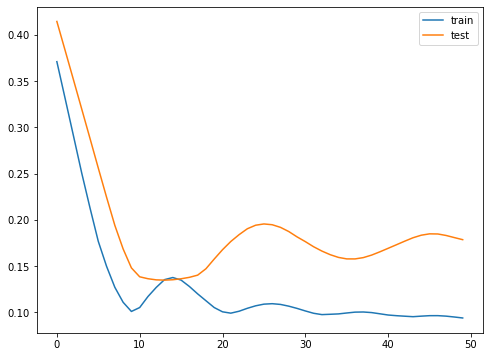

In [20]:
# design network
model = Sequential()
lstm = LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2]))
model.add(lstm)
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [21]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], lag*len(RIO_bestFeatures.columns)))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -len(RIO_bestFeatures.columns) + 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -len(RIO_bestFeatures.columns) + 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)
rmseFullFeatures = rmse

Test RMSE: 0.227


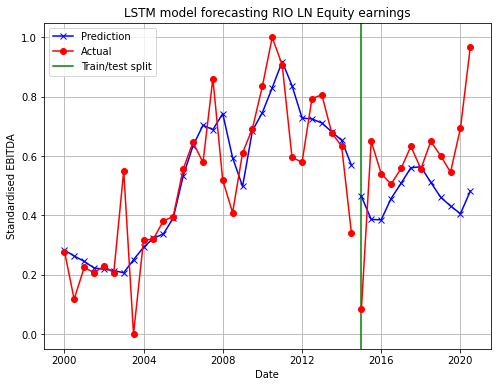

In [22]:
yhatTrain = model.predict(train_X)
plt.plot(RIO_bestFeatures.index[:30], yhatTrain, c = 'b', marker = 'x')
plt.plot(RIO_bestFeatures.index[:30], train_y, c = 'r', marker = 'o')
plt.axvline(RIO_bestFeatures.index[30], c = 'g')
labels = ["Prediction", "Actual", "Train/test split"]
plt.legend(labels)

plt.plot(RIO_bestFeatures.index[30:42], yhat, c = 'b', marker = 'x')
plt.plot(RIO_bestFeatures.index[30:42], test_y, c = 'r', marker = 'o')

plt.title("LSTM model forecasting RIO LN Equity earnings")
plt.ylabel("Standardised EBITDA")
plt.xlabel("Date")
plt.grid()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [23]:
corr = RIO_full.corr()
discardedColumns = []
for column_idx in range(1, len(RIO_full.columns)):
    for row_idx in range (1, len(RIO_full.columns)):
        if (row_idx != column_idx):
            if (corr[corr.columns[column_idx]].loc[corr.columns[row_idx]] > 0.8):
                if (abs(corr['EBITDA'].loc[corr.columns[column_idx]]) > abs(corr['EBITDA'].loc[corr.columns[row_idx]])):
                    if (not corr.columns[row_idx] in discardedColumns):
                        discardedColumns.append(corr.columns[row_idx])
                else:
                    if (not corr.columns[column_idx] in discardedColumns):
                        discardedColumns.append(corr.columns[column_idx])
        else:
            break
discardedColumns

['LMPBDS03_LME_Comdty_PX_LAST',
 'LMCADS03_LME_Comdty_PX_LAST',
 'LMAHDS03_LME_Comdty_PX_LAST',
 'BCOMIN_PX_LAST',
 'UK_GDP growth']

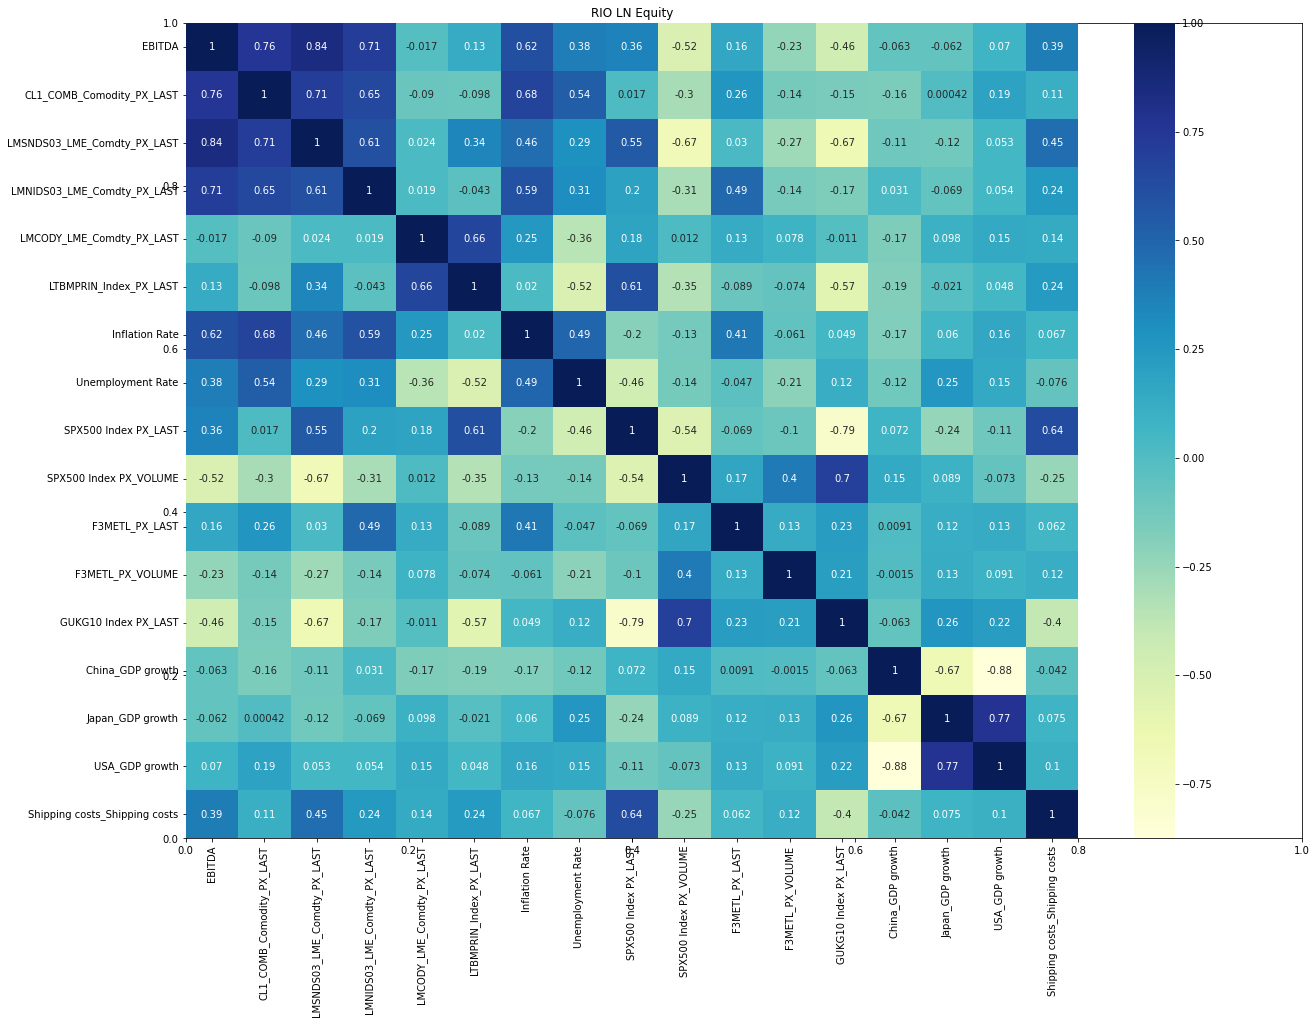

In [24]:
RIO_removedInterCorrelation = RIO_full.drop(discardedColumns, axis = 1)
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("RIO LN Equity")
heatmap = sb.heatmap(RIO_removedInterCorrelation.corr(), cmap="YlGnBu", annot=True)

In [25]:
pvalues = calculate_pvalues(RIO_removedInterCorrelation)
statisticallySignificant = pvalues <= 0.05
discardedColumns = statisticallySignificant[statisticallySignificant['EBITDA'].values == False].index
RIO_final = RIO_removedInterCorrelation.drop(discardedColumns, axis = 1)

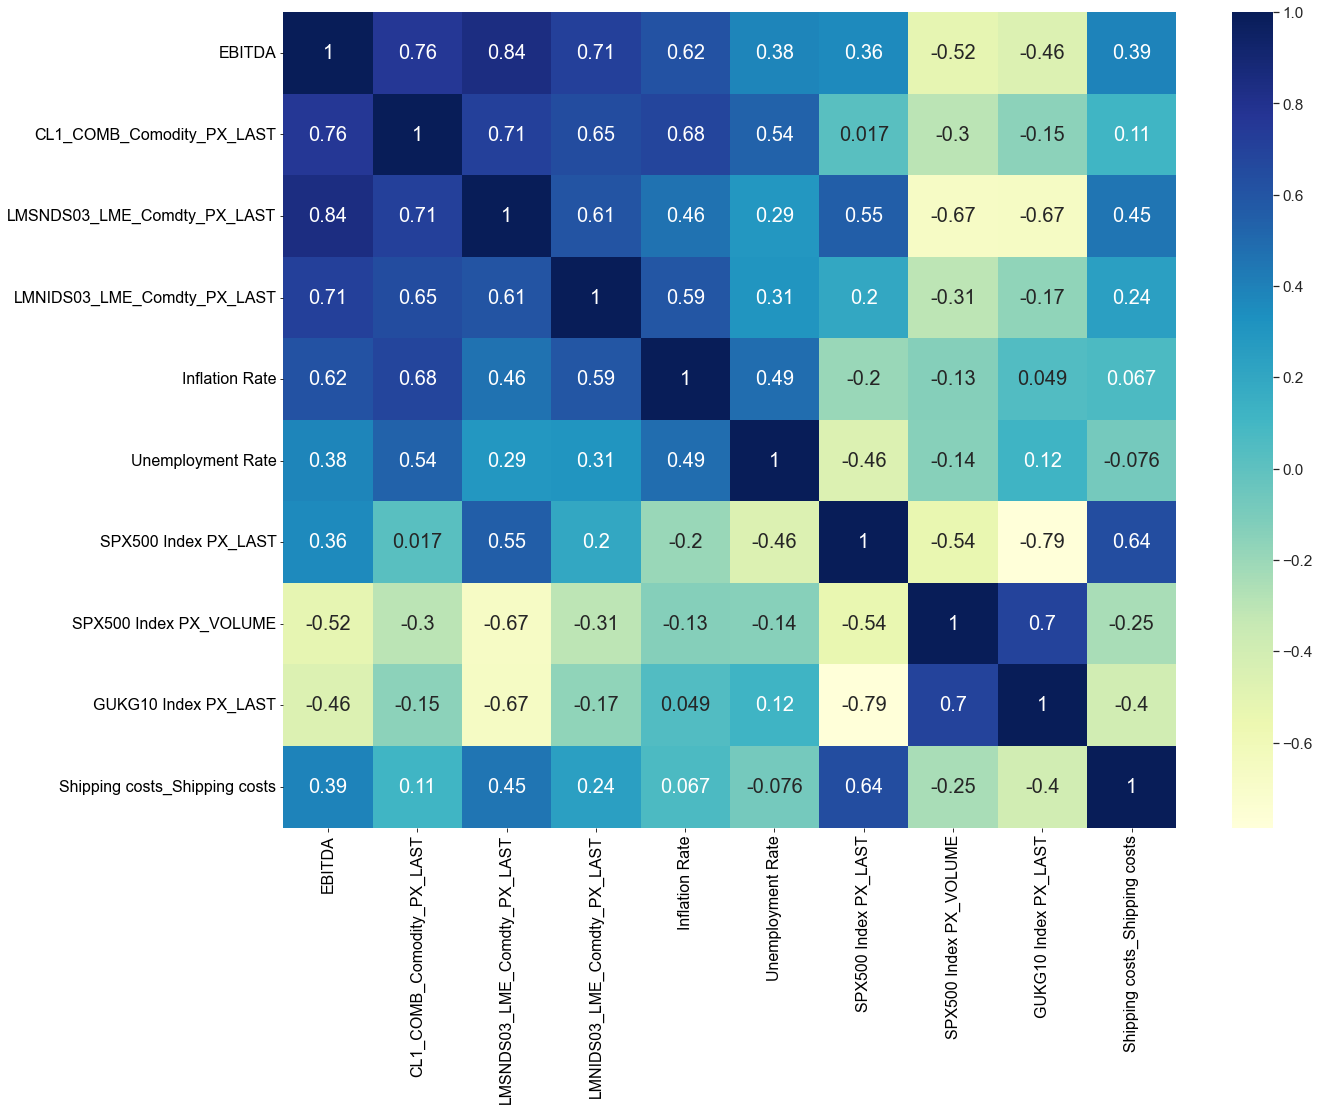

In [26]:
plt.subplots(figsize=(20,15))
# ax = plt.axes()
# ax.set_title("RIO LN Equity")
sb.set(font_scale=1.4)
heatmap = sb.heatmap(RIO_final.corr(), cmap="YlGnBu", annot=True, annot_kws={"fontsize":20})
heatmap.set_xticklabels(heatmap.get_ymajorticklabels(), fontsize = 16)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 16)
plt.savefig("Reduced_heatmap.pdf", bbox_inches='tight', format = 'pdf')

## LSTM with one feature removed from highly linearly correlated features

In [27]:
values = RIO_final.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Lag is number of datapoints it looks previously
lag = 2
reframed = series_to_supervised(scaled, lag, 1)
#reframed.drop(reframed.columns[range(len(RIO_full.columns) + 1, 2*len(RIO_full.columns))], axis=1, inplace=True)
values = reframed.values
n_train_hours = 30
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = lag * len(RIO_final.columns)
train_X, train_y = train[:, :n_obs], train[:, -len(RIO_final.columns)]
test_X, test_y = test[:, :n_obs], test[:, -len(RIO_final.columns)]
# reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], lag, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], lag, test_X.shape[1]))

train_X = train_X.reshape((train_X.shape[0], lag, len(RIO_final.columns)))
test_X = test_X.reshape((test_X.shape[0], lag, len(RIO_final.columns)))

# design network
model = Sequential()
lstm = LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2]))
model.add(lstm)
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], lag*len(RIO_final.columns)))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -len(RIO_final.columns) + 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -len(RIO_final.columns) + 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
rmseAllFeatures = math.sqrt(mean_squared_error(inv_y, inv_yhat))

rmseList = []
for i in range(1, len(RIO_final.columns)):
    RIO_dropFeature = RIO_final.drop([RIO_final.columns[i]], axis = 1)
    values = RIO_dropFeature.values
    values = values.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)

    # Lag is number of datapoints it looks previously
    lag = 2
    reframed = series_to_supervised(scaled, lag, 1)
    #reframed.drop(reframed.columns[range(len(RIO_full.columns) + 1, 2*len(RIO_full.columns))], axis=1, inplace=True)
    values = reframed.values
    n_train_hours = 30
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = lag * len(RIO_dropFeature.columns)
    train_X, train_y = train[:, :n_obs], train[:, -len(RIO_dropFeature.columns)]
    test_X, test_y = test[:, :n_obs], test[:, -len(RIO_dropFeature.columns)]
    # reshape input to be 3D [samples, timesteps, features]
    # train_X = train_X.reshape((train_X.shape[0], lag, train_X.shape[1]))
    # test_X = test_X.reshape((test_X.shape[0], lag, test_X.shape[1]))

    train_X = train_X.reshape((train_X.shape[0], lag, len(RIO_dropFeature.columns)))
    test_X = test_X.reshape((test_X.shape[0], lag, len(RIO_dropFeature.columns)))
    
    # design network
    model = Sequential()
    lstm = LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2]))
    model.add(lstm)
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], lag*len(RIO_dropFeature.columns)))
    # invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X[:, -len(RIO_dropFeature.columns) + 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X[:, -len(RIO_dropFeature.columns) + 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = math.sqrt(mean_squared_error(test_y, yhat))
    rmseList.append(rmse)

Epoch 1/50
1/1 - 1s - loss: 0.5954 - val_loss: 0.6306
Epoch 2/50
1/1 - 0s - loss: 0.5686 - val_loss: 0.6093
Epoch 3/50
1/1 - 0s - loss: 0.5425 - val_loss: 0.5881
Epoch 4/50
1/1 - 0s - loss: 0.5174 - val_loss: 0.5671
Epoch 5/50
1/1 - 0s - loss: 0.4924 - val_loss: 0.5461
Epoch 6/50
1/1 - 0s - loss: 0.4677 - val_loss: 0.5252
Epoch 7/50
1/1 - 0s - loss: 0.4430 - val_loss: 0.5048
Epoch 8/50
1/1 - 0s - loss: 0.4184 - val_loss: 0.4873
Epoch 9/50
1/1 - 0s - loss: 0.3938 - val_loss: 0.4698
Epoch 10/50
1/1 - 0s - loss: 0.3692 - val_loss: 0.4523
Epoch 11/50
1/1 - 0s - loss: 0.3446 - val_loss: 0.4347
Epoch 12/50
1/1 - 0s - loss: 0.3211 - val_loss: 0.4171
Epoch 13/50
1/1 - 0s - loss: 0.2977 - val_loss: 0.3994
Epoch 14/50
1/1 - 0s - loss: 0.2742 - val_loss: 0.3816
Epoch 15/50
1/1 - 0s - loss: 0.2506 - val_loss: 0.3638
Epoch 16/50
1/1 - 0s - loss: 0.2274 - val_loss: 0.3459
Epoch 17/50
1/1 - 0s - loss: 0.2073 - val_loss: 0.3281
Epoch 18/50
1/1 - 0s - loss: 0.1896 - val_loss: 0.3105
Epoch 19/50
1/1 - 0

Epoch 1/50
1/1 - 1s - loss: 0.5151 - val_loss: 0.5881
Epoch 2/50
1/1 - 0s - loss: 0.4945 - val_loss: 0.5717
Epoch 3/50
1/1 - 0s - loss: 0.4738 - val_loss: 0.5551
Epoch 4/50
1/1 - 0s - loss: 0.4530 - val_loss: 0.5386
Epoch 5/50
1/1 - 0s - loss: 0.4321 - val_loss: 0.5219
Epoch 6/50
1/1 - 0s - loss: 0.4110 - val_loss: 0.5050
Epoch 7/50
1/1 - 0s - loss: 0.3897 - val_loss: 0.4881
Epoch 8/50
1/1 - 0s - loss: 0.3691 - val_loss: 0.4709
Epoch 9/50
1/1 - 0s - loss: 0.3487 - val_loss: 0.4549
Epoch 10/50
1/1 - 0s - loss: 0.3281 - val_loss: 0.4402
Epoch 11/50
1/1 - 0s - loss: 0.3072 - val_loss: 0.4252
Epoch 12/50
1/1 - 0s - loss: 0.2867 - val_loss: 0.4101
Epoch 13/50
1/1 - 0s - loss: 0.2684 - val_loss: 0.3948
Epoch 14/50
1/1 - 0s - loss: 0.2511 - val_loss: 0.3793
Epoch 15/50
1/1 - 0s - loss: 0.2342 - val_loss: 0.3636
Epoch 16/50
1/1 - 0s - loss: 0.2183 - val_loss: 0.3479
Epoch 17/50
1/1 - 0s - loss: 0.2045 - val_loss: 0.3322
Epoch 18/50
1/1 - 0s - loss: 0.1906 - val_loss: 0.3163
Epoch 19/50
1/1 - 0

Epoch 9/50
1/1 - 0s - loss: 0.3947 - val_loss: 0.4763
Epoch 10/50
1/1 - 0s - loss: 0.3722 - val_loss: 0.4595
Epoch 11/50
1/1 - 0s - loss: 0.3505 - val_loss: 0.4429
Epoch 12/50
1/1 - 0s - loss: 0.3292 - val_loss: 0.4262
Epoch 13/50
1/1 - 0s - loss: 0.3078 - val_loss: 0.4094
Epoch 14/50
1/1 - 0s - loss: 0.2862 - val_loss: 0.3925
Epoch 15/50
1/1 - 0s - loss: 0.2647 - val_loss: 0.3754
Epoch 16/50
1/1 - 0s - loss: 0.2443 - val_loss: 0.3583
Epoch 17/50
1/1 - 0s - loss: 0.2266 - val_loss: 0.3412
Epoch 18/50
1/1 - 0s - loss: 0.2115 - val_loss: 0.3241
Epoch 19/50
1/1 - 0s - loss: 0.1964 - val_loss: 0.3069
Epoch 20/50
1/1 - 0s - loss: 0.1817 - val_loss: 0.2901
Epoch 21/50
1/1 - 0s - loss: 0.1720 - val_loss: 0.2736
Epoch 22/50
1/1 - 0s - loss: 0.1641 - val_loss: 0.2575
Epoch 23/50
1/1 - 0s - loss: 0.1601 - val_loss: 0.2423
Epoch 24/50
1/1 - 0s - loss: 0.1572 - val_loss: 0.2281
Epoch 25/50
1/1 - 0s - loss: 0.1560 - val_loss: 0.2148
Epoch 26/50
1/1 - 0s - loss: 0.1550 - val_loss: 0.2026
Epoch 27/50

Epoch 31/50
1/1 - 0s - loss: 0.1075 - val_loss: 0.2222
Epoch 32/50
1/1 - 0s - loss: 0.1046 - val_loss: 0.2299
Epoch 33/50
1/1 - 0s - loss: 0.1023 - val_loss: 0.2374
Epoch 34/50
1/1 - 0s - loss: 0.1013 - val_loss: 0.2440
Epoch 35/50
1/1 - 0s - loss: 0.1015 - val_loss: 0.2500
Epoch 36/50
1/1 - 0s - loss: 0.1021 - val_loss: 0.2550
Epoch 37/50
1/1 - 0s - loss: 0.1028 - val_loss: 0.2593
Epoch 38/50
1/1 - 0s - loss: 0.1036 - val_loss: 0.2626
Epoch 39/50
1/1 - 0s - loss: 0.1043 - val_loss: 0.2649
Epoch 40/50
1/1 - 0s - loss: 0.1050 - val_loss: 0.2661
Epoch 41/50
1/1 - 0s - loss: 0.1052 - val_loss: 0.2661
Epoch 42/50
1/1 - 0s - loss: 0.1049 - val_loss: 0.2651
Epoch 43/50
1/1 - 0s - loss: 0.1042 - val_loss: 0.2633
Epoch 44/50
1/1 - 0s - loss: 0.1032 - val_loss: 0.2610
Epoch 45/50
1/1 - 0s - loss: 0.1022 - val_loss: 0.2583
Epoch 46/50
1/1 - 0s - loss: 0.1014 - val_loss: 0.2556
Epoch 47/50
1/1 - 0s - loss: 0.1007 - val_loss: 0.2528
Epoch 48/50
1/1 - 0s - loss: 0.0999 - val_loss: 0.2499
Epoch 49/5

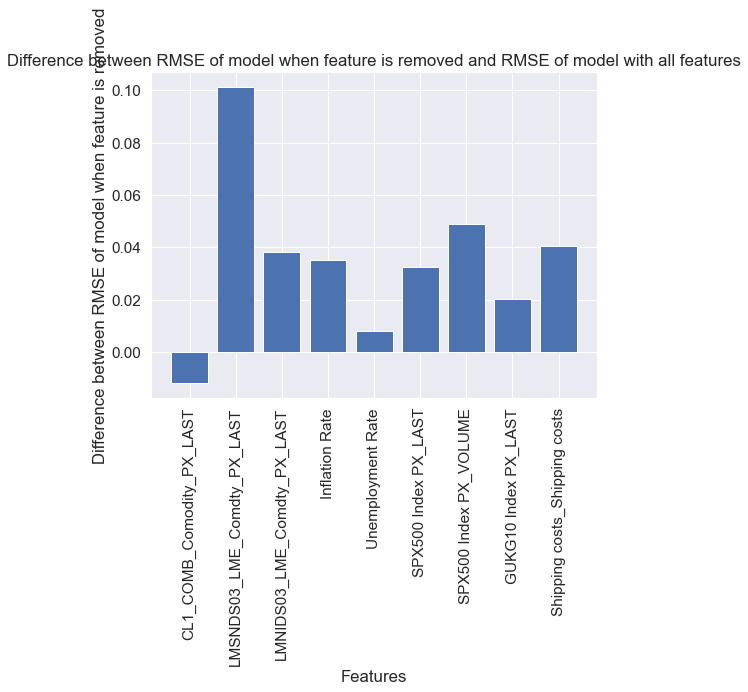

In [28]:
plt.bar(x = RIO_final.columns[1:], height = [rmse - rmseFullFeatures for rmse in rmseList])
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Difference between RMSE of model when feature is removed")
plt.title("Difference between RMSE of model when feature is removed and RMSE of model with all features")
plt.show()

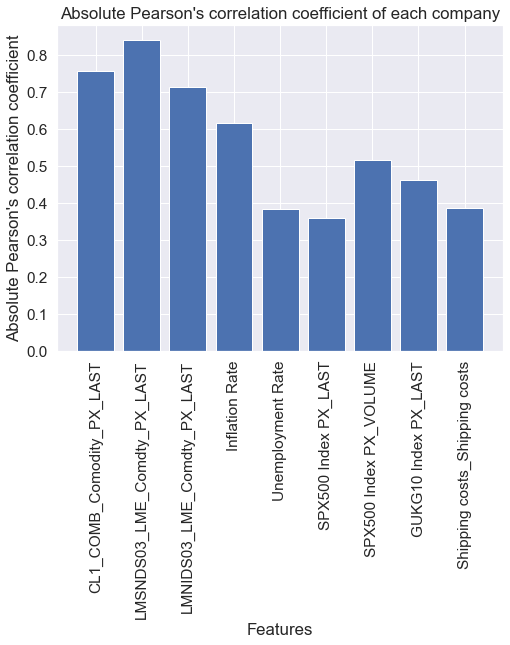

In [29]:
plt.bar(x = RIO_final.columns[1:], height = abs(RIO_final.corr()['EBITDA'][1:].values))
plt.xticks(rotation = 90)
plt.ylabel("Absolute Pearson's correlation coefficient")
plt.xlabel("Features")
plt.title("Absolute Pearson's correlation coefficient of each company")
plt.show()

In [30]:
rmseComp = dict(zip(RIO_final.columns[1:], [rmse - rmseFullFeatures for rmse in rmseList]))
rmseComp

{'CL1_COMB_Comodity_PX_LAST': -0.011919270989947855,
 'LMSNDS03_LME_Comdty_PX_LAST': 0.10136787440718614,
 'LMNIDS03_LME_Comdty_PX_LAST': 0.038094838208614756,
 'Inflation Rate': 0.035187960743721824,
 'Unemployment Rate': 0.007961118590313204,
 'SPX500 Index PX_LAST': 0.03237890701596652,
 'SPX500 Index PX_VOLUME': 0.04873542813884574,
 'GUKG10 Index PX_LAST': 0.020214845153577993,
 'Shipping costs_Shipping costs': 0.04052149511612285}

## LSTM removed one feature with all features

In [31]:
values = RIO_full.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Lag is number of datapoints it looks previously
lag = 2
reframed = series_to_supervised(scaled, lag, 1)
#reframed.drop(reframed.columns[range(len(RIO_full.columns) + 1, 2*len(RIO_full.columns))], axis=1, inplace=True)
values = reframed.values
n_train_hours = 30
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = lag * len(RIO_full.columns)
train_X, train_y = train[:, :n_obs], train[:, -len(RIO_full.columns)]
test_X, test_y = test[:, :n_obs], test[:, -len(RIO_full.columns)]
# reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], lag, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], lag, test_X.shape[1]))

train_X = train_X.reshape((train_X.shape[0], lag, len(RIO_full.columns)))
test_X = test_X.reshape((test_X.shape[0], lag, len(RIO_full.columns)))

# design network
model = Sequential()
lstm = LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2]))
model.add(lstm)
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], lag*len(RIO_full.columns)))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -len(RIO_full.columns) + 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -len(RIO_full.columns) + 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
rmseAllFeatures = math.sqrt(mean_squared_error(inv_y, inv_yhat))

rmseList = []
for i in range(1, len(RIO_full.columns)):
    RIO_dropFeature = RIO_full.drop([RIO_full.columns[i]], axis = 1)
    values = RIO_dropFeature.values
    values = values.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)

    # Lag is number of datapoints it looks previously
    lag = 2
    reframed = series_to_supervised(scaled, lag, 1)
    #reframed.drop(reframed.columns[range(len(RIO_full.columns) + 1, 2*len(RIO_full.columns))], axis=1, inplace=True)
    values = reframed.values
    n_train_hours = 30
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = lag * len(RIO_dropFeature.columns)
    train_X, train_y = train[:, :n_obs], train[:, -len(RIO_dropFeature.columns)]
    test_X, test_y = test[:, :n_obs], test[:, -len(RIO_dropFeature.columns)]
    # reshape input to be 3D [samples, timesteps, features]
    # train_X = train_X.reshape((train_X.shape[0], lag, train_X.shape[1]))
    # test_X = test_X.reshape((test_X.shape[0], lag, test_X.shape[1]))

    train_X = train_X.reshape((train_X.shape[0], lag, len(RIO_dropFeature.columns)))
    test_X = test_X.reshape((test_X.shape[0], lag, len(RIO_dropFeature.columns)))
    
    # design network
    model = Sequential()
    lstm = LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2]))
    model.add(lstm)
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], lag*len(RIO_dropFeature.columns)))
    # invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X[:, -len(RIO_dropFeature.columns) + 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X[:, -len(RIO_dropFeature.columns) + 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = math.sqrt(mean_squared_error(test_y, yhat))
    rmseList.append(rmse)

Epoch 1/50
1/1 - 1s - loss: 0.4257 - val_loss: 0.4434
Epoch 2/50
1/1 - 0s - loss: 0.3832 - val_loss: 0.4078
Epoch 3/50
1/1 - 0s - loss: 0.3408 - val_loss: 0.3720
Epoch 4/50
1/1 - 0s - loss: 0.2982 - val_loss: 0.3359
Epoch 5/50
1/1 - 0s - loss: 0.2597 - val_loss: 0.3000
Epoch 6/50
1/1 - 0s - loss: 0.2265 - val_loss: 0.2640
Epoch 7/50
1/1 - 0s - loss: 0.2021 - val_loss: 0.2294
Epoch 8/50
1/1 - 0s - loss: 0.1874 - val_loss: 0.1969
Epoch 9/50
1/1 - 0s - loss: 0.1773 - val_loss: 0.1706
Epoch 10/50
1/1 - 0s - loss: 0.1673 - val_loss: 0.1494
Epoch 11/50
1/1 - 0s - loss: 0.1656 - val_loss: 0.1421
Epoch 12/50
1/1 - 0s - loss: 0.1684 - val_loss: 0.1450
Epoch 13/50
1/1 - 0s - loss: 0.1712 - val_loss: 0.1540
Epoch 14/50
1/1 - 0s - loss: 0.1742 - val_loss: 0.1605
Epoch 15/50
1/1 - 0s - loss: 0.1778 - val_loss: 0.1643
Epoch 16/50
1/1 - 0s - loss: 0.1791 - val_loss: 0.1657
Epoch 17/50
1/1 - 0s - loss: 0.1779 - val_loss: 0.1644
Epoch 18/50
1/1 - 0s - loss: 0.1746 - val_loss: 0.1613
Epoch 19/50
1/1 - 0

Epoch 23/50
1/1 - 0s - loss: 0.1527 - val_loss: 0.1333
Epoch 24/50
1/1 - 0s - loss: 0.1471 - val_loss: 0.1306
Epoch 25/50
1/1 - 0s - loss: 0.1406 - val_loss: 0.1293
Epoch 26/50
1/1 - 0s - loss: 0.1340 - val_loss: 0.1311
Epoch 27/50
1/1 - 0s - loss: 0.1289 - val_loss: 0.1339
Epoch 28/50
1/1 - 0s - loss: 0.1253 - val_loss: 0.1390
Epoch 29/50
1/1 - 0s - loss: 0.1227 - val_loss: 0.1453
Epoch 30/50
1/1 - 0s - loss: 0.1206 - val_loss: 0.1519
Epoch 31/50
1/1 - 0s - loss: 0.1185 - val_loss: 0.1577
Epoch 32/50
1/1 - 0s - loss: 0.1163 - val_loss: 0.1631
Epoch 33/50
1/1 - 0s - loss: 0.1148 - val_loss: 0.1679
Epoch 34/50
1/1 - 0s - loss: 0.1147 - val_loss: 0.1709
Epoch 35/50
1/1 - 0s - loss: 0.1141 - val_loss: 0.1723
Epoch 36/50
1/1 - 0s - loss: 0.1133 - val_loss: 0.1719
Epoch 37/50
1/1 - 0s - loss: 0.1125 - val_loss: 0.1696
Epoch 38/50
1/1 - 0s - loss: 0.1110 - val_loss: 0.1655
Epoch 39/50
1/1 - 0s - loss: 0.1089 - val_loss: 0.1606
Epoch 40/50
1/1 - 0s - loss: 0.1064 - val_loss: 0.1555
Epoch 41/5

Epoch 45/50
1/1 - 0s - loss: 0.1188 - val_loss: 0.2291
Epoch 46/50
1/1 - 0s - loss: 0.1160 - val_loss: 0.2211
Epoch 47/50
1/1 - 0s - loss: 0.1127 - val_loss: 0.2138
Epoch 48/50
1/1 - 0s - loss: 0.1088 - val_loss: 0.2054
Epoch 49/50
1/1 - 0s - loss: 0.1052 - val_loss: 0.1971
Epoch 50/50
1/1 - 0s - loss: 0.1034 - val_loss: 0.1892
Epoch 1/50
1/1 - 1s - loss: 0.5245 - val_loss: 0.5134
Epoch 2/50
1/1 - 0s - loss: 0.4774 - val_loss: 0.4739
Epoch 3/50
1/1 - 0s - loss: 0.4316 - val_loss: 0.4360
Epoch 4/50
1/1 - 0s - loss: 0.3857 - val_loss: 0.3981
Epoch 5/50
1/1 - 0s - loss: 0.3397 - val_loss: 0.3599
Epoch 6/50
1/1 - 0s - loss: 0.2944 - val_loss: 0.3214
Epoch 7/50
1/1 - 0s - loss: 0.2501 - val_loss: 0.2826
Epoch 8/50
1/1 - 0s - loss: 0.2073 - val_loss: 0.2434
Epoch 9/50
1/1 - 0s - loss: 0.1664 - val_loss: 0.2043
Epoch 10/50
1/1 - 0s - loss: 0.1427 - val_loss: 0.1764
Epoch 11/50
1/1 - 0s - loss: 0.1358 - val_loss: 0.1513
Epoch 12/50
1/1 - 0s - loss: 0.1361 - val_loss: 0.1437
Epoch 13/50
1/1 - 0

Epoch 3/50
1/1 - 0s - loss: 0.3828 - val_loss: 0.4041
Epoch 4/50
1/1 - 0s - loss: 0.3420 - val_loss: 0.3697
Epoch 5/50
1/1 - 0s - loss: 0.3019 - val_loss: 0.3354
Epoch 6/50
1/1 - 0s - loss: 0.2618 - val_loss: 0.3012
Epoch 7/50
1/1 - 0s - loss: 0.2238 - val_loss: 0.2671
Epoch 8/50
1/1 - 0s - loss: 0.1936 - val_loss: 0.2337
Epoch 9/50
1/1 - 0s - loss: 0.1686 - val_loss: 0.2009
Epoch 10/50
1/1 - 0s - loss: 0.1479 - val_loss: 0.1753
Epoch 11/50
1/1 - 0s - loss: 0.1429 - val_loss: 0.1618
Epoch 12/50
1/1 - 0s - loss: 0.1422 - val_loss: 0.1570
Epoch 13/50
1/1 - 0s - loss: 0.1424 - val_loss: 0.1541
Epoch 14/50
1/1 - 0s - loss: 0.1465 - val_loss: 0.1559
Epoch 15/50
1/1 - 0s - loss: 0.1516 - val_loss: 0.1623
Epoch 16/50
1/1 - 0s - loss: 0.1567 - val_loss: 0.1667
Epoch 17/50
1/1 - 0s - loss: 0.1598 - val_loss: 0.1685
Epoch 18/50
1/1 - 0s - loss: 0.1610 - val_loss: 0.1683
Epoch 19/50
1/1 - 0s - loss: 0.1595 - val_loss: 0.1662
Epoch 20/50
1/1 - 0s - loss: 0.1557 - val_loss: 0.1625
Epoch 21/50
1/1 -

Epoch 25/50
1/1 - 0s - loss: 0.1833 - val_loss: 0.1465
Epoch 26/50
1/1 - 0s - loss: 0.1829 - val_loss: 0.1477
Epoch 27/50
1/1 - 0s - loss: 0.1834 - val_loss: 0.1500
Epoch 28/50
1/1 - 0s - loss: 0.1831 - val_loss: 0.1515
Epoch 29/50
1/1 - 0s - loss: 0.1821 - val_loss: 0.1524
Epoch 30/50
1/1 - 0s - loss: 0.1803 - val_loss: 0.1520
Epoch 31/50
1/1 - 0s - loss: 0.1773 - val_loss: 0.1503
Epoch 32/50
1/1 - 0s - loss: 0.1733 - val_loss: 0.1480
Epoch 33/50
1/1 - 0s - loss: 0.1686 - val_loss: 0.1455
Epoch 34/50
1/1 - 0s - loss: 0.1631 - val_loss: 0.1442
Epoch 35/50
1/1 - 0s - loss: 0.1583 - val_loss: 0.1430
Epoch 36/50
1/1 - 0s - loss: 0.1538 - val_loss: 0.1443
Epoch 37/50
1/1 - 0s - loss: 0.1492 - val_loss: 0.1467
Epoch 38/50
1/1 - 0s - loss: 0.1446 - val_loss: 0.1524
Epoch 39/50
1/1 - 0s - loss: 0.1400 - val_loss: 0.1585
Epoch 40/50
1/1 - 0s - loss: 0.1353 - val_loss: 0.1647
Epoch 41/50
1/1 - 0s - loss: 0.1306 - val_loss: 0.1710
Epoch 42/50
1/1 - 0s - loss: 0.1262 - val_loss: 0.1769
Epoch 43/5

Epoch 47/50
1/1 - 0s - loss: 0.0972 - val_loss: 0.1670
Epoch 48/50
1/1 - 0s - loss: 0.0960 - val_loss: 0.1724
Epoch 49/50
1/1 - 0s - loss: 0.0951 - val_loss: 0.1775
Epoch 50/50
1/1 - 0s - loss: 0.0942 - val_loss: 0.1823
Epoch 1/50
1/1 - 1s - loss: 0.5065 - val_loss: 0.5122
Epoch 2/50
1/1 - 0s - loss: 0.4514 - val_loss: 0.4678
Epoch 3/50
1/1 - 0s - loss: 0.3979 - val_loss: 0.4235
Epoch 4/50
1/1 - 0s - loss: 0.3442 - val_loss: 0.3791
Epoch 5/50
1/1 - 0s - loss: 0.2930 - val_loss: 0.3346
Epoch 6/50
1/1 - 0s - loss: 0.2419 - val_loss: 0.2899
Epoch 7/50
1/1 - 0s - loss: 0.1961 - val_loss: 0.2456
Epoch 8/50
1/1 - 0s - loss: 0.1637 - val_loss: 0.2026
Epoch 9/50
1/1 - 0s - loss: 0.1430 - val_loss: 0.1618
Epoch 10/50
1/1 - 0s - loss: 0.1362 - val_loss: 0.1363
Epoch 11/50
1/1 - 0s - loss: 0.1409 - val_loss: 0.1303
Epoch 12/50
1/1 - 0s - loss: 0.1492 - val_loss: 0.1304
Epoch 13/50
1/1 - 0s - loss: 0.1593 - val_loss: 0.1345
Epoch 14/50
1/1 - 0s - loss: 0.1680 - val_loss: 0.1377
Epoch 15/50
1/1 - 0

Epoch 5/50
1/1 - 0s - loss: 0.2113 - val_loss: 0.2021
Epoch 6/50
1/1 - 0s - loss: 0.1926 - val_loss: 0.1748
Epoch 7/50
1/1 - 0s - loss: 0.1790 - val_loss: 0.1586
Epoch 8/50
1/1 - 0s - loss: 0.1693 - val_loss: 0.1529
Epoch 9/50
1/1 - 0s - loss: 0.1632 - val_loss: 0.1597
Epoch 10/50
1/1 - 0s - loss: 0.1614 - val_loss: 0.1708
Epoch 11/50
1/1 - 0s - loss: 0.1614 - val_loss: 0.1818
Epoch 12/50
1/1 - 0s - loss: 0.1637 - val_loss: 0.1894
Epoch 13/50
1/1 - 0s - loss: 0.1656 - val_loss: 0.1926
Epoch 14/50
1/1 - 0s - loss: 0.1659 - val_loss: 0.1922
Epoch 15/50
1/1 - 0s - loss: 0.1636 - val_loss: 0.1888
Epoch 16/50
1/1 - 0s - loss: 0.1592 - val_loss: 0.1829
Epoch 17/50
1/1 - 0s - loss: 0.1530 - val_loss: 0.1751
Epoch 18/50
1/1 - 0s - loss: 0.1462 - val_loss: 0.1679
Epoch 19/50
1/1 - 0s - loss: 0.1413 - val_loss: 0.1616
Epoch 20/50
1/1 - 0s - loss: 0.1376 - val_loss: 0.1559
Epoch 21/50
1/1 - 0s - loss: 0.1338 - val_loss: 0.1526
Epoch 22/50
1/1 - 0s - loss: 0.1301 - val_loss: 0.1510
Epoch 23/50
1/1

Epoch 27/50
1/1 - 0s - loss: 0.1607 - val_loss: 0.1603
Epoch 28/50
1/1 - 0s - loss: 0.1559 - val_loss: 0.1556
Epoch 29/50
1/1 - 0s - loss: 0.1505 - val_loss: 0.1505
Epoch 30/50
1/1 - 0s - loss: 0.1446 - val_loss: 0.1490
Epoch 31/50
1/1 - 0s - loss: 0.1387 - val_loss: 0.1486
Epoch 32/50
1/1 - 0s - loss: 0.1348 - val_loss: 0.1502
Epoch 33/50
1/1 - 0s - loss: 0.1318 - val_loss: 0.1541
Epoch 34/50
1/1 - 0s - loss: 0.1288 - val_loss: 0.1610
Epoch 35/50
1/1 - 0s - loss: 0.1259 - val_loss: 0.1677
Epoch 36/50
1/1 - 0s - loss: 0.1231 - val_loss: 0.1741
Epoch 37/50
1/1 - 0s - loss: 0.1209 - val_loss: 0.1795
Epoch 38/50
1/1 - 0s - loss: 0.1200 - val_loss: 0.1837
Epoch 39/50
1/1 - 0s - loss: 0.1201 - val_loss: 0.1866
Epoch 40/50
1/1 - 0s - loss: 0.1204 - val_loss: 0.1882
Epoch 41/50
1/1 - 0s - loss: 0.1203 - val_loss: 0.1887
Epoch 42/50
1/1 - 0s - loss: 0.1200 - val_loss: 0.1879
Epoch 43/50
1/1 - 0s - loss: 0.1197 - val_loss: 0.1854
Epoch 44/50
1/1 - 0s - loss: 0.1188 - val_loss: 0.1814
Epoch 45/5

Epoch 49/50
1/1 - 0s - loss: 0.0990 - val_loss: 0.1652
Epoch 50/50
1/1 - 0s - loss: 0.0998 - val_loss: 0.1653
Epoch 1/50
1/1 - 1s - loss: 0.5775 - val_loss: 0.5671
Epoch 2/50
1/1 - 0s - loss: 0.5336 - val_loss: 0.5265
Epoch 3/50
1/1 - 0s - loss: 0.4914 - val_loss: 0.4858
Epoch 4/50
1/1 - 0s - loss: 0.4492 - val_loss: 0.4466
Epoch 5/50
1/1 - 0s - loss: 0.4068 - val_loss: 0.4119
Epoch 6/50
1/1 - 0s - loss: 0.3648 - val_loss: 0.3771
Epoch 7/50
1/1 - 0s - loss: 0.3242 - val_loss: 0.3420
Epoch 8/50
1/1 - 0s - loss: 0.2834 - val_loss: 0.3068
Epoch 9/50
1/1 - 0s - loss: 0.2424 - val_loss: 0.2711
Epoch 10/50
1/1 - 0s - loss: 0.2059 - val_loss: 0.2355
Epoch 11/50
1/1 - 0s - loss: 0.1770 - val_loss: 0.2017
Epoch 12/50
1/1 - 0s - loss: 0.1654 - val_loss: 0.1768
Epoch 13/50
1/1 - 0s - loss: 0.1555 - val_loss: 0.1546
Epoch 14/50
1/1 - 0s - loss: 0.1523 - val_loss: 0.1483
Epoch 15/50
1/1 - 0s - loss: 0.1540 - val_loss: 0.1524
Epoch 16/50
1/1 - 0s - loss: 0.1599 - val_loss: 0.1615
Epoch 17/50
1/1 - 0

Epoch 7/50
1/1 - 0s - loss: 0.2148 - val_loss: 0.2601
Epoch 8/50
1/1 - 0s - loss: 0.2013 - val_loss: 0.2270
Epoch 9/50
1/1 - 0s - loss: 0.1906 - val_loss: 0.2015
Epoch 10/50
1/1 - 0s - loss: 0.1869 - val_loss: 0.1813
Epoch 11/50
1/1 - 0s - loss: 0.1854 - val_loss: 0.1635
Epoch 12/50
1/1 - 0s - loss: 0.1854 - val_loss: 0.1531
Epoch 13/50
1/1 - 0s - loss: 0.1850 - val_loss: 0.1487
Epoch 14/50
1/1 - 0s - loss: 0.1838 - val_loss: 0.1483
Epoch 15/50
1/1 - 0s - loss: 0.1833 - val_loss: 0.1501
Epoch 16/50
1/1 - 0s - loss: 0.1819 - val_loss: 0.1525
Epoch 17/50
1/1 - 0s - loss: 0.1801 - val_loss: 0.1543
Epoch 18/50
1/1 - 0s - loss: 0.1777 - val_loss: 0.1546
Epoch 19/50
1/1 - 0s - loss: 0.1743 - val_loss: 0.1536
Epoch 20/50
1/1 - 0s - loss: 0.1700 - val_loss: 0.1515
Epoch 21/50
1/1 - 0s - loss: 0.1651 - val_loss: 0.1493
Epoch 22/50
1/1 - 0s - loss: 0.1595 - val_loss: 0.1468
Epoch 23/50
1/1 - 0s - loss: 0.1534 - val_loss: 0.1452
Epoch 24/50
1/1 - 0s - loss: 0.1469 - val_loss: 0.1461
Epoch 25/50
1

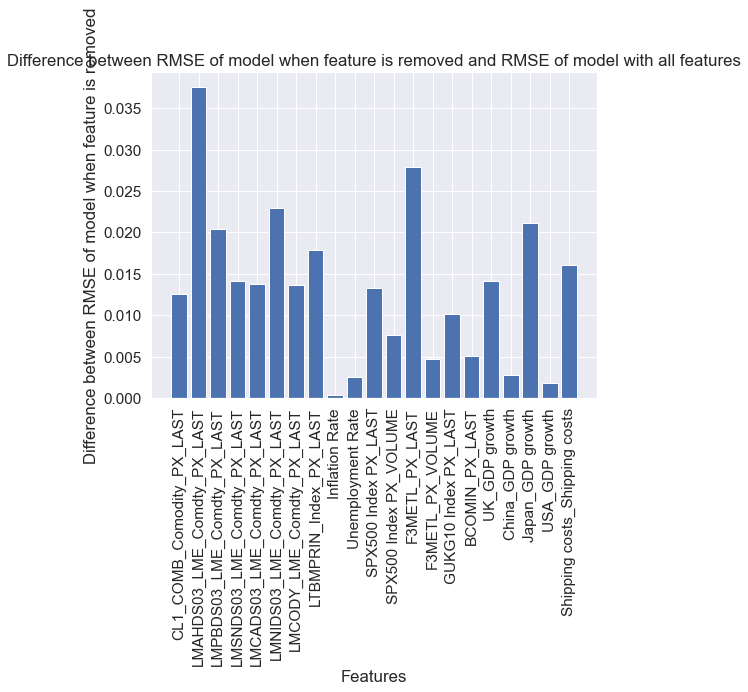

In [32]:
plt.bar(x = RIO_full.columns[1:], height = [abs(rmse - rmseFullFeatures) for rmse in rmseList])
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Difference between RMSE of model when feature is removed")
plt.title("Difference between RMSE of model when feature is removed and RMSE of model with all features")
plt.show()

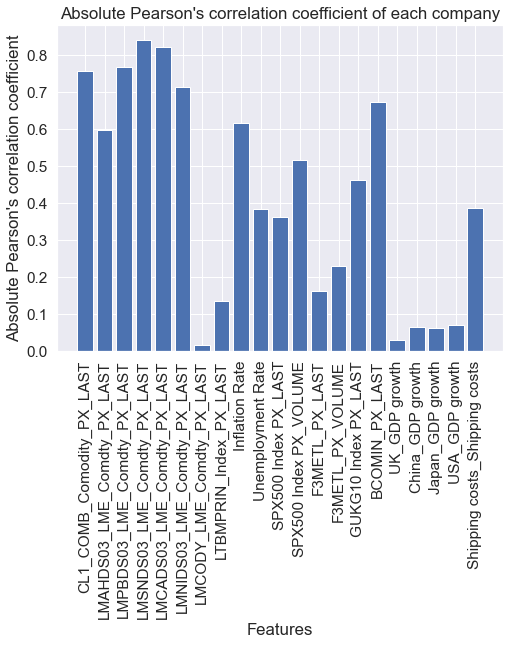

In [33]:
plt.bar(x = RIO_full.columns[1:], height = abs(RIO_full.corr()['EBITDA'][1:].values))
plt.xticks(rotation = 90)
plt.ylabel("Absolute Pearson's correlation coefficient")
plt.xlabel("Features")
plt.title("Absolute Pearson's correlation coefficient of each company")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


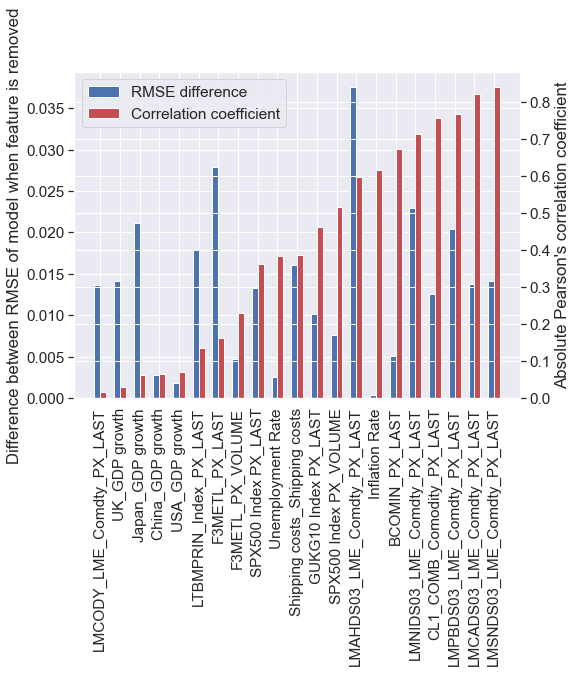

In [34]:
zip_iterator = zip(RIO_full.columns[1:], abs(RIO_full.corr()['EBITDA'][1:].values))
corr_dict = dict(zip_iterator)
companyCorrSorted = sorted(corr_dict, key=corr_dict.get)

zip_iterator = zip(RIO_full.columns[1:], [abs(rmse - rmseFullFeatures) for rmse in rmseList])
rmse_dict = dict(zip_iterator)
rmse_list_corr_order = []
for company in companyCorrSorted:
    rmse_list_corr_order.append(rmse_dict[company])

x = np.arange(len(RIO_full.columns) - 1)
ax1 = plt.subplot()
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w /2, companyCorrSorted, rotation='vertical')
modelAccuracy =ax1.bar(x, rmse_list_corr_order, width=w, color='b', align='center')
plt.ylabel("Difference between RMSE of model when feature is removed")
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()

correlation = ax2.bar(x + w, sorted(abs(RIO_full.corr()['EBITDA'][1:].values)), width=w,color='r',align='center')

plt.ylabel("Absolute Pearson's correlation coefficient")
#To set the legend on the plot we have used plt.legend()
plt.legend([modelAccuracy, correlation],["RMSE difference", "Correlation coefficient"])
plt.savefig("LSTM_RMSE_Difference.eps", bbox_inches='tight', format = 'eps')
#To show the plot finally we have used plt.show().
plt.show()

In [35]:
rmseList

[0.21445357699598475,
 0.1894314350414609,
 0.2065179597760588,
 0.24107507593811778,
 0.2131940009966438,
 0.24989628875778908,
 0.21332306644077975,
 0.20903924417799702,
 0.2273505170542557,
 0.22950391536532974,
 0.2401980240774712,
 0.21932139021475824,
 0.2548747445068276,
 0.2223038477958032,
 0.21687764733702286,
 0.221937970171414,
 0.2127868942086964,
 0.22420063144967536,
 0.2058255698082287,
 0.22516864311001203,
 0.21091574097481341]

In [36]:
rmseAllFeatures

5069.754826419124

In [37]:
rmseFullFeatures

0.22695802824465483

In [39]:
RIO_full = fd.GetFullDatasetForCompany("BHP LN Equity")
RIO_full.index = RIO_full['Date']
RIO_full = RIO_full.drop('Date', axis = 1)
RIO_full

C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\WranglerFunctions.py:138: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(location   , index_col=False, names=["Dates", "PX_LAST"])
C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\WranglerFunctions.py:138: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(location   , index_col=False, names=["Dates", "PX_LAST"])
C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\FullDataset.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,EBITDA,CL1_COMB_Comodity_PX_LAST,LMAHDS03_LME_Comdty_PX_LAST,LMPBDS03_LME_Comdty_PX_LAST,LMSNDS03_LME_Comdty_PX_LAST,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,LMCODY_LME_Comdty_PX_LAST,LTBMPRIN_Index_PX_LAST,Inflation Rate,...,SPX500 Index PX_VOLUME,F3METL_PX_LAST,F3METL_PX_VOLUME,GUKG10 Index PX_LAST,BCOMIN_PX_LAST,UK_GDP growth,China_GDP growth,Japan_GDP growth,USA_GDP growth,Shipping costs_Shipping costs
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,2489,25.60,1650.00,495.5,6125.0,1169.92932,5250.27881,39125.0,100.00,1.1,...,1.072386e+09,4188.60,9624338.0,5.662,80.1822,1.0,2.4,7.0,1.5,998.2346
2000-06-30,-44,32.50,1580.00,449.0,5510.0,1180.81665,5310.37646,39125.0,100.00,0.8,...,1.258792e+09,2323.00,9624338.0,5.171,76.2545,0.6,2.4,1.9,7.5,998.2346
2001-01-01,3279,26.80,1565.00,483.0,5195.0,1223.13721,4559.14844,39125.0,100.00,0.8,...,1.318392e+09,1697.10,9624338.0,4.881,74.5400,0.9,2.4,3.0,-1.3,998.2346
2001-07-02,-654,26.25,1473.00,453.0,4625.0,1108.59253,4278.52930,39125.0,100.00,1.7,...,1.256211e+09,1480.40,9624338.0,5.302,66.0225,0.5,2.4,-4.3,-1.6,998.2346
2001-12-31,1965,19.84,1355.00,497.0,3940.0,1023.74707,3848.54346,39125.0,100.00,1.1,...,1.089302e+09,1733.20,9624338.0,5.054,58.5132,0.2,2.4,-1.4,1.1,998.2346
2002-07-01,1549,26.86,1388.00,461.0,4460.0,1104.12988,4686.17041,39125.0,100.00,0.6,...,1.590400e+09,2112.30,21369987.0,5.010,63.8257,0.7,2.4,1.3,1.6,998.2346
2002-12-31,2069,31.20,1350.00,436.0,4280.0,968.64325,4427.19629,39125.0,100.00,1.7,...,1.084224e+09,656.00,2508529.0,4.374,59.2308,0.9,2.4,1.1,0.5,998.2346
2003-06-30,1540,30.19,1365.00,479.0,4650.0,1001.33105,4967.32813,39125.0,100.00,1.1,...,1.353031e+09,2427.00,37377019.0,4.157,62.0931,0.8,2.4,2.8,3.6,998.2346
2003-12-31,9947,32.52,1600.00,724.0,6525.0,1290.23218,9251.99023,39125.0,100.00,1.3,...,8.362977e+08,4854.00,11824331.0,4.802,84.1474,0.8,2.4,4.4,4.7,998.2346


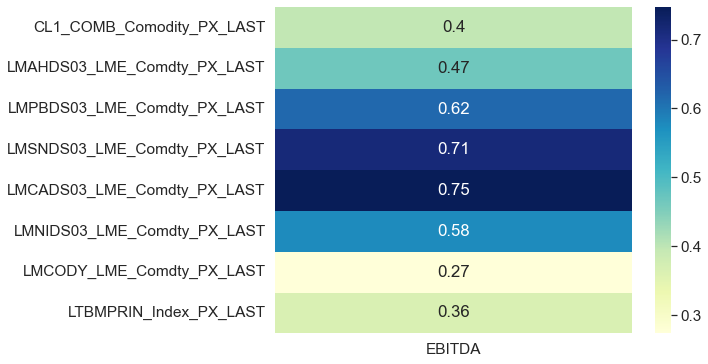

In [58]:
df = pd.DataFrame({"EBITDA": RIO_full[RIO_full.columns[0:9]].corr().iloc[0]},
                  index=RIO_full.columns[1:9])

heatmap = sb.heatmap(df, cmap="YlGnBu", annot=True)
plt.savefig("Commodities_EBITDA.pdf", bbox_inches='tight', format = 'pdf')